## Import statements

In [0]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense, Flatten
from keras.models import Model, Sequential
from keras.optimizers import RMSprop

In [0]:
#!pip install kaggle

In [0]:
#!kaggle competitions download -c winter2020-mais-202

## Load the data


In [0]:
!unzip winter2020-mais-202.zip
!ls

Archive:  winter2020-mais-202.zip
  inflating: label_int_to_str_mapping.csv  
  inflating: sample_submission.csv   
  inflating: test_images.npy         
  inflating: train_images.npy        
  inflating: train_labels.csv        
label_int_to_str_mapping.csv  test_images.npy	winter2020-mais-202.zip
sample_data		      train_images.npy
sample_submission.csv	      train_labels.csv


In [0]:
train_images = np.load("train_images.npy")
test_images = np.load("test_images.npy")

# visualize an image

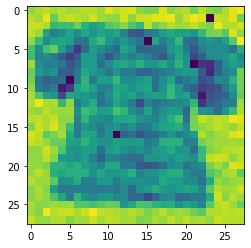

In [0]:
import matplotlib.pyplot as plt

def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[0]) # 0 is the index of the training image you want to display

In [0]:
train_labels = np.array((pd.read_csv("train_labels.csv", index_col = 'ID')) ).astype(int)

#flatten the images
data1=[]
data2=[]
for img in train_images:
  image_flatten=img.flatten()
  np.reshape(image_flatten, (28, 28))
  data1.append(image_flatten)
for img in test_images:
  image_flatten=img.flatten()
  np.reshape(image_flatten, (28, 28))
  data2.append(image_flatten)
#scale the pixel to range [0,1]
train_images = np.array(data1, dtype="float") /255
test_images = np.array(data2, dtype="float") /255

In [0]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0])

(50000, 784)
(50000, 1)
[6]


In [0]:
#img_rows, img_cols = 28, 28
#input_shape = (img_rows, img_cols, 1)

In [0]:
# get a validation set
size = int (len(train_images) *0.2)
print(size)
train_images = train_images[:-size]
train_labels = train_labels[:-size].squeeze()
valid_images = train_images[-size:]
valid_labels = train_labels[-size:].squeeze()

10000


In [0]:
print(train_labels.shape)
print(train_images.shape)

(40000,)
(40000, 784)


In [0]:
#lb = preprocessing.LabelBinarizer()
#train_labels = lb.fit_transform(train_labels)
#valid_labels = lb.transform(valid_labels)
#print(train_labels[0])

[0 0 0 0 0 0 1 0 0 0]


In [0]:
'''
x = Input(shape=(28,28))

#Encoder
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')
'''

In [0]:
#train_images, valid_images = train_images.reshape(-1, 28 * 28), valid_images.reshape(-1, 28 * 28)

train_images, valid_images = train_images.reshape((-1, 28, 28, 1)), valid_images.reshape((-1, 28, 28, 1))

#Model

In [0]:
'''
batch_size = 128
epochs = 50
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))

def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder.summary()
'''

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         1475

In [0]:
#autoencoder_train = autoencoder.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_images, valid_labels))

# Model 2

In [0]:
'''
singleton_shape = (1, 28 * 28)
encoding_dim = 8

encoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
  tf.keras.layers.Dense(encoding_dim, activation=tf.nn.sigmoid),
])

decoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(encoding_dim, activation=tf.nn.sigmoid, input_shape=(encoding_dim,)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(28 * 28, activation=tf.nn.sigmoid),
])
autoencoder = tf.keras.models.Sequential([encoder,decoder])

autoencoder.compile(optimizer='adam',
              loss='binary_crossentropy')


autoencoder.fit(train_images, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
'''

# Model 3 - The Real one

In [0]:
model = Sequential([
  Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)),
  Conv2D(32, kernel_size=3, activation='relu'),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 127s 3ms/step - loss: 0.6160 - acc: 0.7788 - val_loss: 0.4479 - val_acc: 0.8347
Epoch 2/10
40000/40000 [==============================] - 129s 3ms/step - loss: 0.4371 - acc: 0.8428 - val_loss: 0.3903 - val_acc: 0.8567
Epoch 3/10
40000/40000 [==============================] - 128s 3ms/step - loss: 0.3828 - acc: 0.8604 - val_loss: 0.3203 - val_acc: 0.8854
Epoch 4/10
40000/40000 [==============================] - 129s 3ms/step - loss: 0.3425 - acc: 0.8738 - val_loss: 0.2771 - val_acc: 0.9013
Epoch 5/10
40000/40000 [==============================] - 130s 3ms/step - loss: 0.3045 - acc: 0.8888 - val_loss: 0.2413 - val_acc: 0.9140
Epoch 6/10
40000/40000 [==============================] - 128s 3ms/step - loss: 0.2682 - acc: 0.9013 - val_loss: 0.2408 - val_acc: 0.9133
Epoch 7/10
40000/40000 [==============================] - 129s 3ms/step - loss: 0.2326 - acc: 0.9149 - val_loss: 0.1873 - 

In [0]:
#model.evaluate(valid_images, valid_labels)

In [0]:
#test_images = np.load('test_images.npy').squeeze()
#test_images = test_images.reshape(len(test_images), -1)
test_images=test_images.reshape((-1, 28, 28, 1))
y_test = model.predict_classes(test_images)

df_test = pd.read_csv('sample_submission.csv')
df_test['label'] = y_test
df_test.to_csv('submission.csv', index=False)